In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
plt.style.use('science')
matplotlib.rcParams.update({'font.size': 18})


NOTE TO MYSELF: Source 9 rerun *is* included in this, edited line 239 of Result_files/high_f/final_best_positions.txt manually

In [2]:
# Mac Bodge for TeX
import os 
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

# LOW F

In [3]:
low_f_results = np.loadtxt('../Result_files/low_f/final_best_positions.txt')
low_f_priors = np.load('../Result_files/low_f/priors.npy')

In [4]:
np.where(low_f_priors==0.0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [5]:
low_f_priors[714]

array([[4.9e-03, 5.0e-03],
       [6.5e+01, 7.0e+01]])

In [6]:
f_low_priors = np.log10(low_f_priors[:,0,:])
mc_priors = low_f_priors[:,1,:]

In [7]:
upsilon_maxes = low_f_results[:,-1]

In [8]:
mc_priors,f_low_priors

(array([[ 5., 10.],
        [10., 15.],
        [15., 20.],
        ...,
        [80., 85.],
        [85., 90.],
        [90., 95.]]),
 array([[-3.        , -2.95860731],
        [-3.        , -2.95860731],
        [-3.        , -2.95860731],
        ...,
        [-2.00877392, -2.00436481],
        [-2.00877392, -2.00436481],
        [-2.00877392, -2.00436481]]))

In [9]:
f_low_anchors = f_low_priors[:,0]
mc_anchors = mc_priors[:,0]

f_low_widths = np.diff(f_low_priors,axis=1).flatten()
mc_widths = np.diff(mc_priors,axis=1).flatten()


In [10]:
f_low_anchors

array([-3.        , -3.        , -3.        , ..., -2.00877392,
       -2.00877392, -2.00877392])

In [11]:
master_upsilon_maxes = list(upsilon_maxes)
master_f_low_anchors = list(f_low_anchors)
master_mc_anchors = list(mc_anchors)
master_f_low_widths = list(f_low_widths)
master_mc_widths = list(mc_widths)


In [12]:
np.argwhere(upsilon_maxes>90)


array([[868]])

In [13]:
low_f_priors[36]

array([[1.2e-03, 1.3e-03],
       [5.0e+00, 1.0e+01]])

In [14]:
low_f_priors[868]

array([[5.8e-03, 5.9e-03],
       [2.5e+01, 3.0e+01]])

In [15]:
low_f_results[36]

array([ 9.99997524e+00,  5.81142429e+00,  5.52082983e-01,  9.96041414e-03,
        1.26822276e-03,  3.71845599e+00, -1.03065263e+00,  1.09567444e+00,
        6.80379621e+01])

# HIGH F

In [46]:
# These are the tiles in which even with 3 hour TF segment the whole evolution of the signal cannot be split up into N_high segments. I.e the beginning of the search does not work
broken_tiles = np.loadtxt('broken_tiles.txt',dtype=int)
broken_tiles = broken_tiles[broken_tiles<1201]

/var/folders/8g/7279dvmd20vd_b85_lr8pfh80000gp/T/ipykernel_5682/902570437.py:2: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  broken_tiles = np.loadtxt('broken_tiles.txt',dtype=int)


In [17]:
broken_tiles

array([ 845,  863,  880,  881,  897,  898,  899,  915,  916,  917,  932,
        933,  934,  935,  950,  951,  952,  953,  967,  968,  969,  970,
        971,  985,  986,  987,  988,  989, 1002, 1003, 1004, 1005, 1006,
       1007, 1020, 1021, 1022, 1023, 1024, 1025, 1037, 1038, 1039, 1040,
       1041, 1042, 1043, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1072,
       1073, 1074, 1075, 1076, 1077, 1078, 1079, 1090, 1091, 1092, 1093,
       1094, 1095, 1096, 1097, 1107, 1108, 1109, 1110, 1111, 1112, 1113,
       1114, 1115, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1160, 1161,
       1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1178, 1179, 1180,
       1181, 1182, 1183, 1184, 1185, 1186, 1187, 1195, 1196, 1197, 1198,
       1199, 1200])

In [18]:
np.diff(broken_tiles)

array([18, 17,  1, 16,  1,  1, 16,  1,  1, 15,  1,  1,  1, 15,  1,  1,  1,
       14,  1,  1,  1,  1, 14,  1,  1,  1,  1, 13,  1,  1,  1,  1,  1, 13,
        1,  1,  1,  1,  1, 12,  1,  1,  1,  1,  1,  1, 12,  1,  1,  1,  1,
        1,  1, 11,  1,  1,  1,  1,  1,  1,  1, 11,  1,  1,  1,  1,  1,  1,
        1, 10,  1,  1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,
        1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  9,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1,  8,  1,  1,
        1,  1,  1])

In [19]:
high_f_results = np.loadtxt('../Result_files/high_f/final_best_positions.txt')
high_f_priors = np.load('../Result_files/high_f/priors.npy')

In [20]:
high_f_results.shape

(1201, 9)

In [21]:
high_f_results = np.delete(high_f_results,broken_tiles,axis=0)
high_f_priors = np.delete(high_f_priors,broken_tiles,axis=0)

In [22]:
high_f_results.shape

(1078, 9)

In [23]:
f_low_priors = np.log10(high_f_priors[:,0,:])
mc_priors = high_f_priors[:,1,:]

In [24]:
upsilon_maxes = high_f_results[:,-1]

In [25]:
np.argwhere(upsilon_maxes>90)


array([[ 24],
       [ 40],
       [238],
       [309]])

In [26]:
high_f_priors[24]

array([[1.1e-02, 1.2e-02],
       [3.5e+01, 4.0e+01]])

In [27]:
upsilon_maxes[24]

494.7976150359645

In [28]:
np.all(np.isnan(np.diff(f_low_priors,axis=1).flatten())==False)

True

In [29]:
upsilon_maxes[upsilon_maxes>90]

array([494.79761504, 151.83822519, 405.45371476, 409.17748033])

In [30]:
f_low_anchors = f_low_priors[:,0]
mc_anchors = mc_priors[:,0]

f_low_widths = np.diff(f_low_priors,axis=1).flatten()
mc_widths = np.diff(mc_priors,axis=1).flatten()


In [31]:
upsilon_maxes.shape

(1078,)

In [32]:
master_upsilon_maxes.extend(list(upsilon_maxes))
master_f_low_anchors.extend(list(f_low_anchors))
master_mc_anchors.extend(list(mc_anchors))
master_f_low_widths.extend(list(f_low_widths))
master_mc_widths.extend(list(mc_widths))


In [33]:
master_upsilon_maxes

[84.5585802463927,
 77.10306926636174,
 64.01618209207365,
 54.30334421763816,
 55.077165864517035,
 48.97475164453349,
 53.43833288438659,
 54.21716262441953,
 54.52211201157013,
 42.33964508822867,
 40.995546876827405,
 38.85756720576839,
 47.63251736266703,
 48.344553556113695,
 39.3487571968963,
 41.50525198519864,
 38.63759079475967,
 29.010142986005224,
 44.19966289743183,
 55.978506812149114,
 43.2173311424747,
 44.33060758413338,
 41.69321461832273,
 42.10643318249484,
 41.95004695456957,
 39.66713618730627,
 44.95928540188316,
 44.859517576466196,
 49.21238424610188,
 49.01623532317999,
 38.09336561318938,
 46.0292414624547,
 39.07254527468385,
 35.068369748585425,
 35.21817353315391,
 36.104022793153334,
 68.03796212228492,
 71.43589140331488,
 70.70809827030418,
 67.96921998464879,
 64.61307258929726,
 48.20371555511122,
 47.892443047078764,
 38.55343349596971,
 42.638047538242134,
 38.87209732615657,
 46.47391645805162,
 47.480279481274344,
 40.11287866721717,
 36.157727554

In [34]:
np.any(master_mc_widths==np.nan)

False

In [35]:
# master_upsilon_maxes = np.array(master_upsilon_maxes).flatten()
# master_f_low_anchors = np.array(master_f_low_anchors).flatten()
# master_mc_anchors = np.array(master_mc_anchors).flatten()
# master_f_low_widths = np.array(master_f_low_widths).flatten()
# master_mc_widths = np.array(master_mc_widths).flatten()


In [36]:
# cmap = matplotlib.cm.get_cmap('jet') # Get desired colormap - you can change this!
# max_height = np.max(upsilon_maxes)   # get range of colorbars so we can normalize
# min_height = np.min(upsilon_maxes)
# # scale each z to [0,1], and get their rgb values
# rgba = [cmap((k-min_height)/max_height) for k in upsilons]

In [37]:
colors = ['g' if i is i>=90 else 'r' for i in master_upsilon_maxes]

In [38]:
high_f_results[309]

array([2.24111399e+01, 3.64825175e+00, 3.44875260e-02, 3.64292581e-05,
       2.76543486e-02, 1.69658166e+00, 1.52459253e-01, 1.64933495e+00,
       4.09177480e+02])

In [39]:
f_low_sources = [5.85830665*1.e-3,
                 3.00851783*1.e-3,
                 3.00698596*1.e-3,
                 12.24273032*1.e-3,
                 28.02352272 *1.e-3,
                 27.65438527*1.e-3,
                 23.76783772*1.e-3,
                 11.31112717*1.e-3]
mc_sources  =[29.34741587,
              38.04622881,
              34.51216704,
              27.41970433,
              7.007404972,
              22.40969304,
              26.08583360,
              39.14942200]
labels = ['1',
          '2', 
          '3',
          '5',
          '6',
          '8',
          '9',
          '10']

In [40]:
%matplotlib inline

In [41]:
matplotlib.rcParams.update({'font.size': 23})


In [42]:
np.where(np.array(master_upsilon_maxes)>90)

(array([ 868, 1626, 1642, 1840, 1911]),)

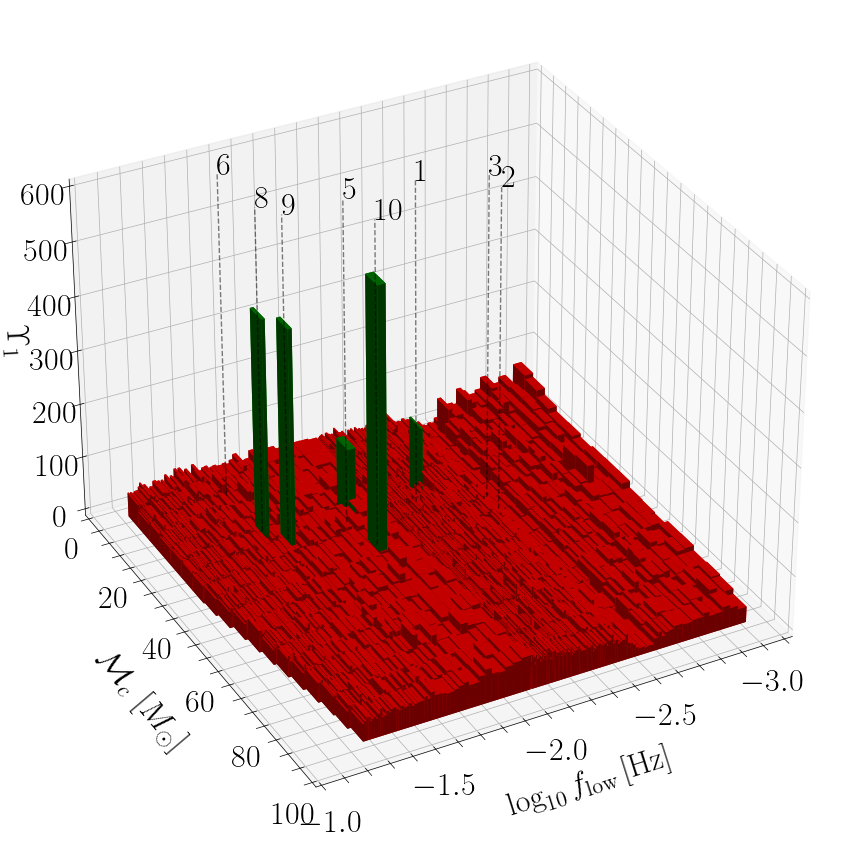

In [45]:
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(121, projection='3d')
ax.view_init(elev=32
             , azim=62)
bottom_anchor_points = np.zeros_like(master_upsilon_maxes)

ax.bar3d(np.array(master_f_low_anchors),
         np.array(master_mc_anchors), 
         np.array(bottom_anchor_points), 
         np.array(master_f_low_widths),
         np.array(master_mc_widths), 
         np.array(master_upsilon_maxes), shade=True,color=colors,zorder=1)

ax.set_xlabel(r'$\mathrm{log}_{\mathrm{10}}\, f_{\mathrm{low}} \, [\rm Hz]$',labelpad = 15)
ax.set_ylabel(r'$\mathcal{M}_c \,\,  [M_{\odot}]$',labelpad = 15)
ax.set_zlabel(r'$\Upsilon_{1}$',labelpad=7)


# Comented out bit of code plots the sources at their actual locations rather than the middle of the tiles

# for i in range(len(f_low_sources)):
#     ax.plot([np.log10(f_low_sources[i]),np.log10(f_low_sources[i])],
#              [mc_sources[i],mc_sources[i]],
#              [0,600],lw=2,color='k',ls='--',zorder=3)
#     # print(i)
#     ax.text(np.log10(f_low_sources[i]),mc_sources[i],600,labels[i])

for i in range(len(f_low_sources)):

    # Following stuff just makes it easier to plot the sources in the middle of the tiles
    
    d_Mc = 5 
    Mcs = np.arange(5,100,d_Mc)

    # High frequency 
    if f_low_sources[i] >= 0.01:
        d_flow = 0.001
        f_lows = np.arange(0.01,0.1,d_flow)

        f_index = np.searchsorted(f_lows,f_low_sources[i])

        f_low_plot = (f_lows[f_index-1]+f_lows[f_index])/2

        Mc_index = np.searchsorted(Mcs,mc_sources[i])

        Mc_plot = (Mcs[Mc_index-1]+Mcs[Mc_index])/2

        
    #Low frequency 
    else:
        d_flow = 0.0001
        f_lows = np.arange(0.001,0.01,d_flow)

        f_index = np.searchsorted(f_lows,f_low_sources[i])

        f_low_plot = (f_lows[f_index-1]+f_lows[f_index])/2

        Mc_index = np.searchsorted(Mcs,mc_sources[i])

        Mc_plot = (Mcs[Mc_index-1]+Mcs[Mc_index])/2

    ax.plot([np.log10(f_low_plot),np.log10(f_low_plot)],
             [Mc_plot,Mc_plot],
             [0,600],lw=1,color='k',ls='--',zorder=3,alpha=0.5)

    ax.text(np.log10(f_low_plot),Mc_plot,600,labels[i])


# ax.set_xscale('log')
plt.tight_layout()
plt.savefig('Results.pdf')
plt.show()

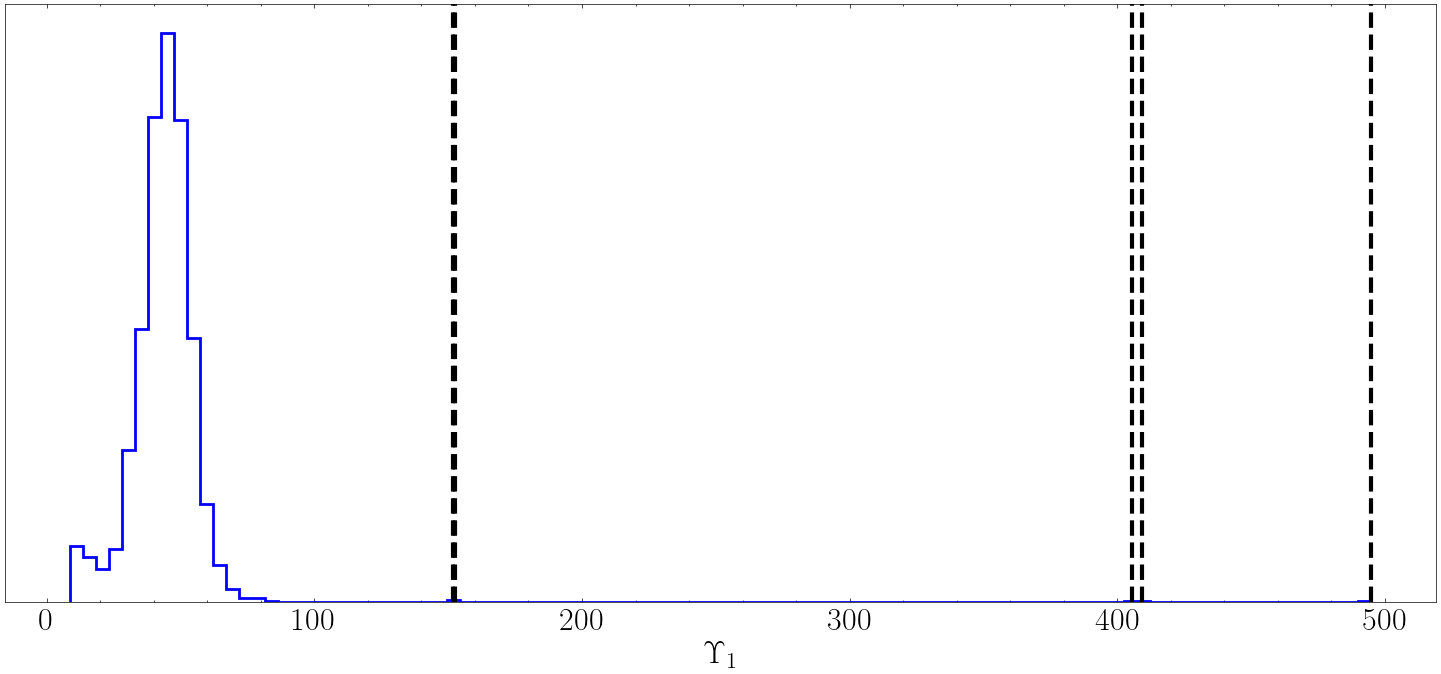

In [44]:
fig = plt.figure(figsize=(15,7))

plt.hist(master_upsilon_maxes,bins=100,histtype='step',density=True,color='b',lw=2)

masked_upsilon_maxes= np.array(master_upsilon_maxes)[np.array(master_upsilon_maxes)>90]
for i in masked_upsilon_maxes:
    plt.axvline(i,color='k',lw=3,ls='--')
plt.yticks([])
plt.tight_layout()
plt.xlabel(r'$\Upsilon_1$')
plt.savefig('Results_hist.pdf')
plt.show()